In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import pandas as pd
import random

# plt.style.use('seaborn')

Load Dataset and check datatypes

In [2]:
df = pd.read_csv("ActivitySlope_2023-12-03T1631.csv")
# print(df)
##  Shorten col names
df.rename(columns = {'Participant ID':'ID'}, inplace = True)
df.rename(columns = {'Activity Slope Total':'Activity_Tot_S'}, inplace = True)
df.rename(columns = {'Activity Slope Rwlw':'RwLw'}, inplace = True)
df.rename(columns = {'Activity Slope Lw':'Lw'}, inplace = True)
df.rename(columns = {'Activity Slope Rw':'Rw'}, inplace = True)
# df.rename(columns = {'Activity Slope Data Activity Slope RaLa':'RaLa'}, inplace = True) ##Does not exist
df.rename(columns = {'Activity Slope La':'La'}, inplace = True)
df.rename(columns = {'Activity Slope Ra':'Ra'}, inplace = True)
df = df[['ID', 'Lw', 'Rw', 'RwLw', 'La', 'Ra', 'Activity_Tot_S']]
df= df.sort_values(by=['ID'], ascending=True)
print(df.iloc[0:5,:])
print(df.dtypes) ## Show data types

   ID        Lw        Rw      RwLw        La        Ra  Activity_Tot_S
0  47 -0.593439 -0.708385 -0.343756 -0.377951 -0.603635       -2.029527
1  48 -0.330180 -0.331600 -0.344070 -0.319484 -0.381217       -1.706552
2  49 -0.094749 -0.121770 -0.069363 -0.109974 -0.117975       -0.478496
3  50       NaN       NaN       NaN       NaN       NaN             NaN
4  52 -0.044095 -0.084581 -0.530835 -0.763907 -0.606714       -2.455185
ID                  int64
Lw                float64
Rw                float64
RwLw              float64
La                float64
Ra                float64
Activity_Tot_S    float64
dtype: object


Get stats

In [3]:
print(df)

        ID        Lw        Rw      RwLw        La        Ra  Activity_Tot_S
0       47 -0.593439 -0.708385 -0.343756 -0.377951 -0.603635       -2.029527
1       48 -0.330180 -0.331600 -0.344070 -0.319484 -0.381217       -1.706552
2       49 -0.094749 -0.121770 -0.069363 -0.109974 -0.117975       -0.478496
3       50       NaN       NaN       NaN       NaN       NaN             NaN
4       52 -0.044095 -0.084581 -0.530835 -0.763907 -0.606714       -2.455185
...    ...       ...       ...       ...       ...       ...             ...
1371  2147       NaN       NaN       NaN       NaN       NaN             NaN
1372  2148       NaN       NaN       NaN       NaN       NaN             NaN
1373  2149       NaN       NaN       NaN       NaN       NaN             NaN
1374  2150       NaN       NaN       NaN       NaN       NaN             NaN
1375  2151       NaN       NaN       NaN       NaN       NaN             NaN

[1376 rows x 7 columns]


In [4]:
df.describe()

,ID,Lw,Rw,RwLw,La,Ra,Activity_Tot_S
count,1376.000000,479.000000,479.000000,477.000000,479.000000,480.000000,475.000000
mean,1117.854651,-0.303564,-0.225328,-0.178915,-0.182245,-0.175202,-0.826142
std,639.608243,0.931475,1.061662,1.554637,1.213107,1.649329,7.413432
min,47.000000,-7.597432,-9.268609,-19.567155,-7.553235,-22.067704,-45.541110
25%,532.750000,-0.555949,-0.497143,-0.568745,-0.555454,-0.551160,-2.739803
50%,1109.500000,-0.154867,-0.128692,-0.098529,-0.130558,-0.095008,-0.675036
75%,1691.250000,0.000000,0.022900,0.164291,0.123360,0.147081,0.324215
max,2151.000000,3.255951,11.346008,10.061640,9.712238,14.311584,75.285942


Histograms

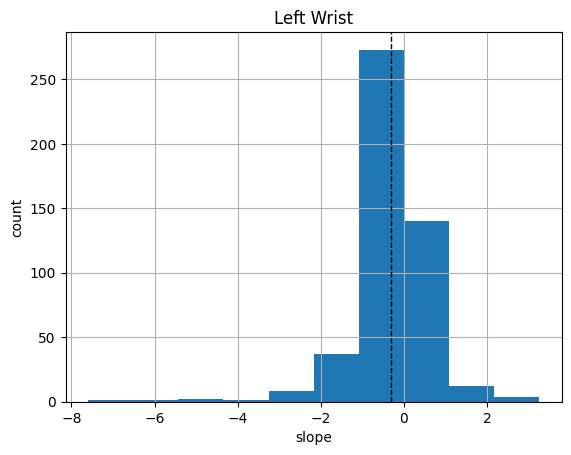

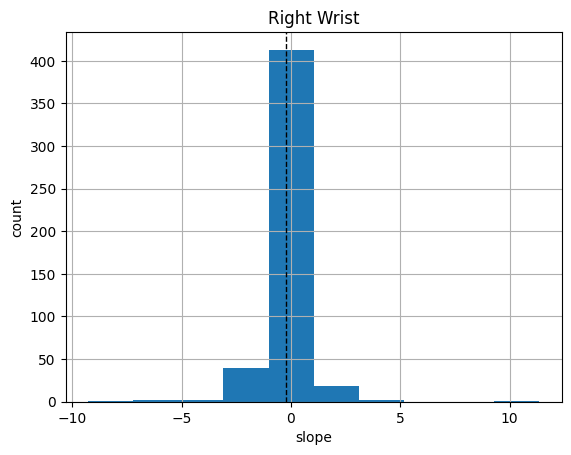

<AxesSubplot: title={'center': 'Rw Outliers'}, xlabel='ID', ylabel='Rw'>

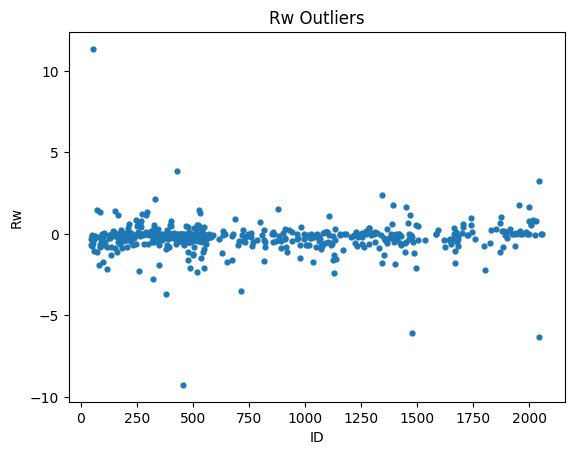

In [5]:
df['Lw'].hist()  ##Lw values
plt.axvline(df['Lw'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel("slope")
plt.ylabel("count")
plt.title('Left Wrist')
plt.show()
df['Rw'].hist()  ##Rw values
plt.axvline(df['Rw'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel("slope")
plt.ylabel("count")
plt.title('Right Wrist')
plt.show()

df.plot(kind='scatter', x='ID', y='Rw', s=12, title="Rw Outliers")